In [1]:
import sys
import os
# Add the directory containing 'thesis_utils.py' to the system path
sys.path.append(os.path.abspath('..'))  # If 'thesis_utils.py' is one level up
# Or use this if it's in the same directory as the notebook:
# sys.path.append(os.getcwd())
# os.environ["JULIA_NUM_THREADS"] = "8" 
os.environ["PYTHON_JULIACALL_HANDLE_SIGNALS"] = "yes"
os.environ["PYTHON_JULIACALL_THREADS"] = "auto"
os.environ["PYTHON_JULIACALL_OPTLEVEL"] = "3"
from pysr import PySRRegressor
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

from thesis_utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [ ]:
import importlib
import thesis_utils  # or whatever your module is called

importlib.reload(thesis_utils)

from thesis_utils import *

In [6]:
data = pd.read_csv("C:/Users/svenl/vs_code_projects/hyperRealDataDescriber/data/insurance/insurance_original.csv")
# encode categorical column 'smoker' with only two categories to numerical representation as this one is highly correlated with 'charges' column
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [8]:
# Generate the profiling report
profile_full = ProfileReport(data, title="insurance_original", explorative=True)

# Display the report in the notebook
profile_full.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# variable assignment according to correlation structure
independents_lst = ['age', 'smoker']
dependent_var = 'charges'
X = data[independents_lst].to_numpy()
y = data[dependent_var].to_numpy()

20250423_092221_SYCa5E

256 iterations, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3)

20250423_093032_9RtTy9

1024 iterations, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3)

20250423_100258_eZjRU9

1024 iterations, no denoising



316**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=1e+03)


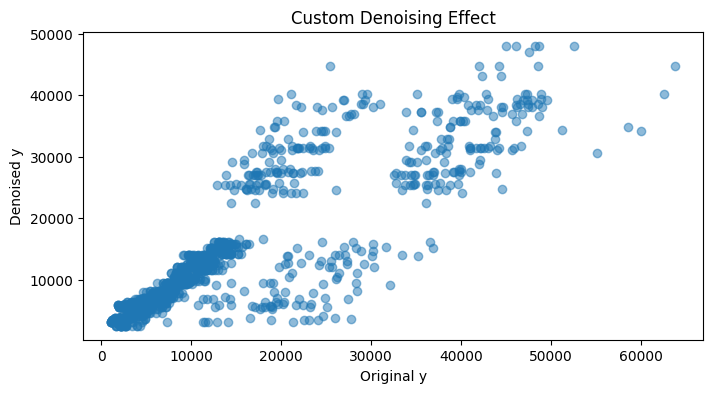

In [20]:
%matplotlib inline
y_denoised = bound_denoise(X, y, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3), show_denoising_effect=True)

In [29]:
sr_model = PySRRegressor(
        niterations=1024,  # Number of iterations to search for equations
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["sin", "cos", "exp", "log", "abs", "sqrt"],
        elementwise_loss="loss(x, y) = (x - y)^2",  # Define loss function (mean squared error)
        verbosity=0,
        maxsize=50
    )
sr_model.fit(X, y)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          13269.835   
	1         0.133116                                       x1 * 32051.8   
	2         0.600538                                exp(x1) * 10634.059   
	3         0.100194                        (x1 * 23616.273) + 8435.021   
	4         0.021595                         exp(x1) * (x0 * 261.29993)   
	5   >>>>  0.274187               (x0 * 222.51553) - (x1 * -23480.105)   
	6         0.007975         (x0 * (x0 + 173.3064)) - (x1 * -23698.879)   
	7         0.003259  (x1 + exp(-2.424629 - (x0 / -30.620554))) * 23...   
	8         0.002113  ((x0 * 3.459023) * x0) - ((x1 * -23868.078) - ...   
	9         0.000101  (((x0 * 3.4517522) * (x1 + x0)) - (x1 * -23734...   
	10        0.002960  (((9.465975 - x0) / -84.58393) + x1) * (abs(68...   
	11        0.001917  (((x1 / abs(sin(x0))) * 82.09367) + 23232.637)...   
	12        0.003627  (((8.576348 - x0) / -84.81101) + x1) * (((-44....   
	13        0.002132  (23224.848 + abs((60.846893 / sin(x0)) / sin(0...   
	14        0.005888  ((((x1 * -60.80925) / sin(x0)) / sin(x0 * 0.68...   
	15        0.000688  (abs((x1 / sin(x0 * 0.6801608)) * (-63.98912 /...   
	16        0.000280  ((abs((x1 / sin(x0 * 0.6801608)) / sin(sin(x0)...   
	17        0.000204  (abs((x1 / sin(x0 * 0.6801608)) * (-63.98912 /...   
	18        0.001859  ((((x1 * -62.92164) / sin(x0)) / sin(x0 * 0.68...   
	19        0.001295  (((cos(exp(x0)) + (8.728433 - x0)) / -84.60765...   
	20        0.000330  (((x1 * (-61.24592 / sin(x0 * 0.6800998))) / s...   
	21        0.001079  (x1 + ((((cos(exp(x0)) * 2.3183827) - x0) + 8....   
	22        0.000638  (abs(((x1 * 65.84647) / sin(x0)) / sin(x0 * 0....   
	23        0.000884  (((x1 * (-62.92164 / sin(x0))) / sin(x0 * 0.68...   
	24        0.000947  (x1 + (((cos(exp(x0)) - (x0 - sin(x0 * 0.19577...   
	25        0.000449  (((((cos(exp(x0)) * 2.319026) - (x0 - sin(x0 *...   
	26        0.001178  (((((cos(exp(x0)) * 2.319026) - (x0 - sin(x0 *...   
	27        0.000447  ((((cos(exp(x0)) * exp(x1)) + (8.727435 - (x0 ...   
	28        0.000202  ((((cos(exp(x0)) * exp(x1)) + (8.727435 - (x0 ...   
	29        0.001492  (((((cos(exp(x0)) * exp(x1)) + 8.727435) - (x0...   
	30        0.000204  (abs(((x1 * -62.92164) / sin(sin(x0))) / sin(x...   
	31        0.000417  (x1 + (((cos(exp(x0)) * exp(x1)) + (9.143025 -...   
	32        0.000996  (23077.346 + abs(((x1 / sin(x0 * 0.68011796)) ...   
	33        0.000245  ((((9.143025 - ((x0 - sin(x0 * 0.19869971)) - ...   
	34        0.000292  (((((sin(x0 * 0.6787001) * exp(x1 + 0.6564326)...   
	35        0.000552  (((((cos(exp(x0)) * exp(x1)) - (((x0 - sin(x0 ...   
	36        0.001784  (abs(((x1 * 67.18854) / sin(x0 * 0.68011796)) ...   
	37        0.000147  ((abs(((x1 * 67.18854) / sin(x0 * 0.68011796))...   
	38        0.000105  x0 + (((abs(x1 * ((-67.37631 / sin(x0 * 0.6801...   
	39        0.002292  (abs(((67.18854 * x1) / sin(x0 * 0.68011796)) ...   
	
	           loss  complexity  
	0   146542720.0           1  
	1   112289940.0           3  
	2    61592868.0           4  
	3    55720700.0           5  
	4    54530324.0           6  
	5    41453416.0           7  
	6    40797510.0           9  
	7    40664764.0          10  
	8    40578944.0          11  
	9    40570784.0          13  
	10   40331284.0          15  
	11   40176924.0          17  
	12   39886510.0          19  
	13   39801572.0          20  
	14   39567890.0          21  
	15   39540660.0          22  
	16   39529600.0          23  
	17   39521530.0          24  
	18   39448132.0          25  
	19   39397080.0          26  
	20   39384076.0          27  
	21   39341584.0          28  
	22   39316484.0          29  
	23   39281732.0          30  
	24   39244544.0          31  
	25   39226916.0          32  
	26   39180750.0          33  
	27   39163230.0          34  
	28   39155316.0          35  
	29  

In [ ]:
# 20250423_093032_9RtTy9
# Complexity 26
candidate_function = generate_candidate_function("(((((200.81007 / cos(x1)) + (x0 + x0)) + -215.74731) * 133.7772) + x0) - ((x0 * (x1 / sin(x0))) / sin(x0 + -0.33310875))")

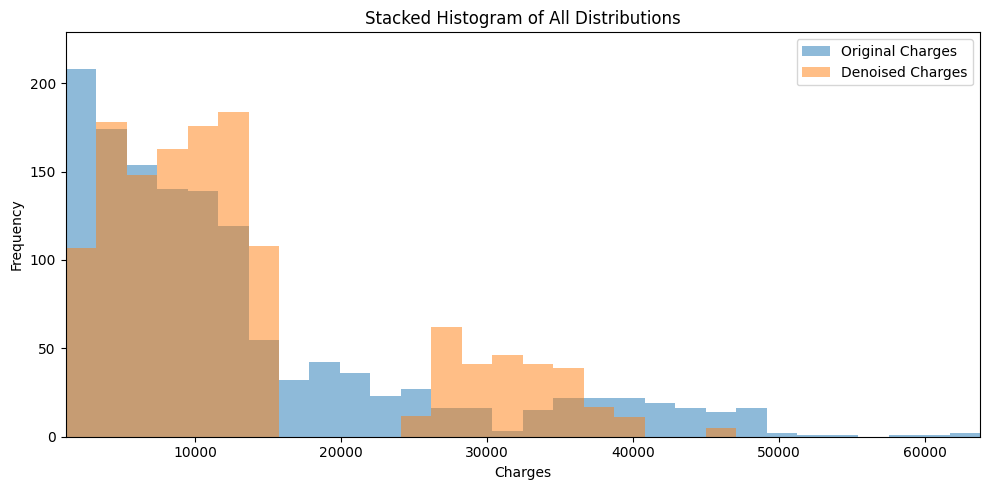

In [44]:
y_denoised = candidate_function(X)
plot_histograms([(y, 'Original Charges', None), (y_denoised, 'Denoised Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

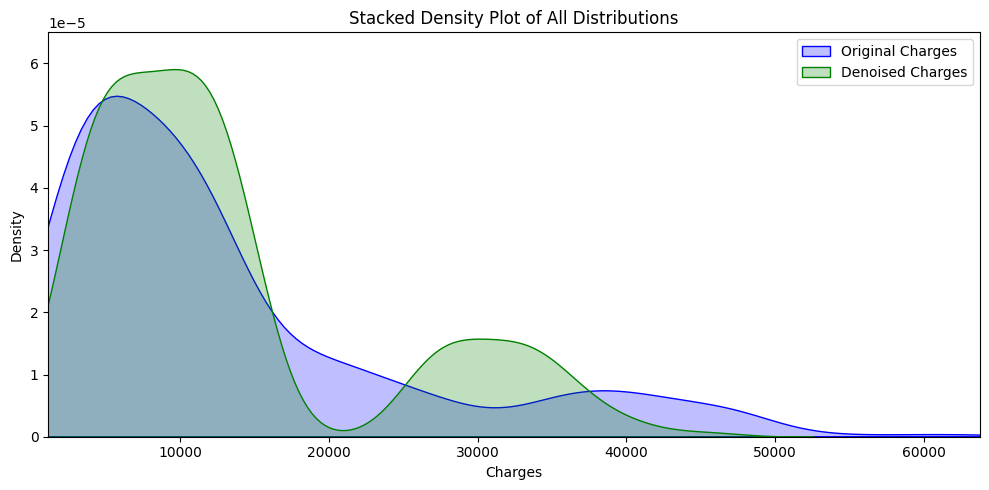

In [45]:
plot_densities([(y, 'Original Charges', 'blue'), (y_denoised, 'Denoised Charges', 'green')], 'Charges', stack=True, figsize_per_plot=(10, 5))

In [38]:
orig_residuals = y - y_denoised

In [39]:
y_renoised, best_amp, errors, _ = renoise_predictions(y, y_denoised, method='stratified', seed=42, clip_lower=0, clip_upper=None, original_residuals=None, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run

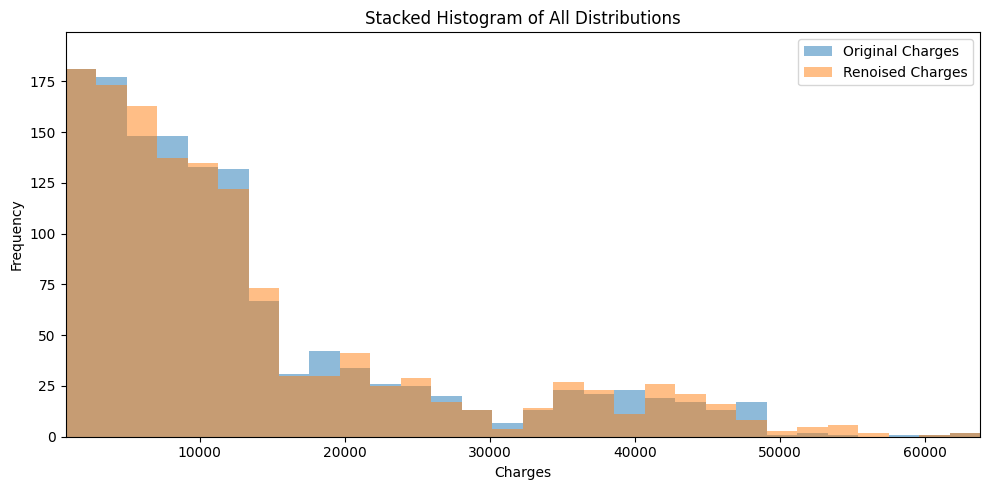

In [47]:
plot_histograms([(y, 'Original Charges', None), (y_renoised, 'Renoised Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

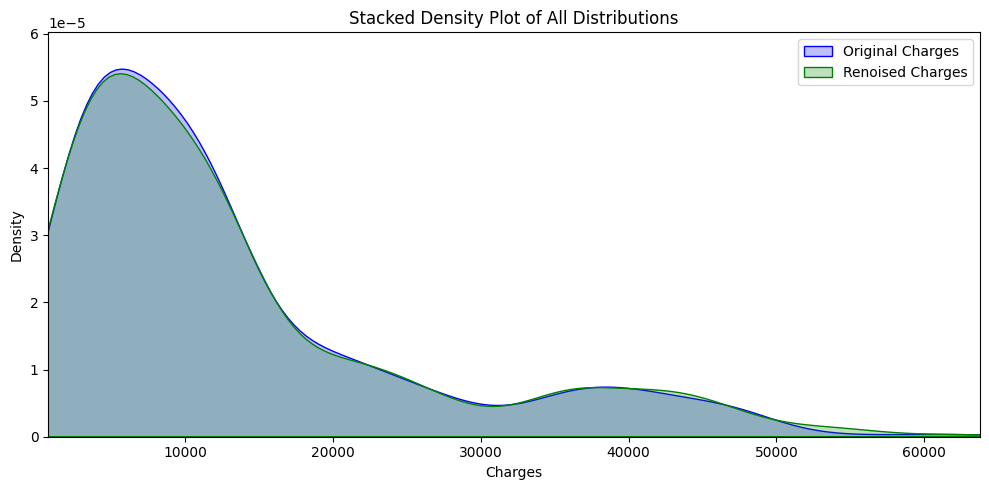

In [48]:
plot_densities([(y, 'Original Charges', 'blue'), (y_renoised, 'Renoised Charges', 'green')], 'Charges', stack=True, figsize_per_plot=(10, 5))

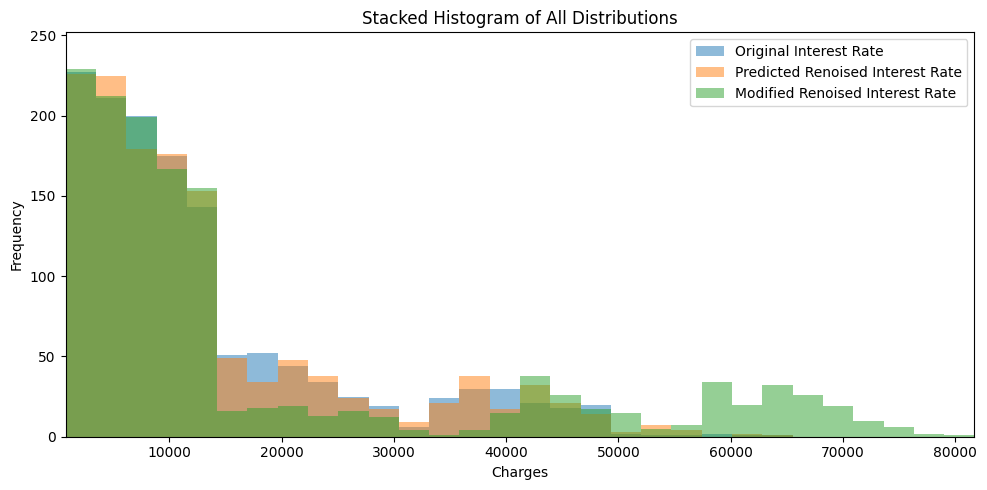

In [52]:
mod_candidate_function = generate_candidate_function("(((((200.81007 / cos(1.2*x1)) + (x0 + x0)) + -215.74731) * 133.7772) + x0) - ((x0 * (x1 / sin(x0))) / sin(x0 + -0.33310875))")
mod_y_denoised_total = mod_candidate_function(X)
mod_y_renoised, best_amp, errors, _ = renoise_predictions(y, mod_y_denoised_total, method='stratified', amplification_factor=1.0, seed=42, clip_lower=0, clip_upper=None, original_residuals=orig_residuals, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run
plot_histograms([(y, 'Original Interest Rate', None), (y_renoised, 'Predicted Renoised Interest Rate', None), (mod_y_renoised, 'Modified Renoised Interest Rate', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))